<a href="https://colab.research.google.com/github/bguan2020/deep_chem_kaggle/blob/master/keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import sys

In [0]:
from tensorflow import keras

In [0]:
data = keras.datasets.fashion_mnist

In [8]:
print(data)

<module 'tensorflow.python.keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


In [0]:
!pip install tensorflow==2.0.0-alpha0

In [9]:
(test_data, test_labels),(train_data, train_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
print(test_labels)

[9 0 0 ... 3 0 5]


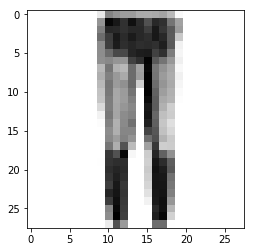

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_data[3], cmap=plt.cm.binary)
plt.show()

In [0]:
#shrink down image data into values between [0,1]
train_data = train_data/255
test_data = test_data/255



In [17]:
#setting up actual model
#first flatten the data from 2-d array 28x28 to 1-d 1x28^2
#input is the 1-d array, output is 0-9 the classification numbers
image_length = 28 #num of pixels
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_length,image_length)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#mathematical models to compile
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_data, train_labels, epochs=5) #every iteration changes the NN, so repetition SHOULD increase accuracy

#compare with test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Tested Acc :", test_acc)



Epoch 1/5
10000/10000 [==============================] - 1s 94us/sample - loss: 0.7210 - accuracy: 0.7446
Epoch 2/5
10000/10000 [==============================] - 1s 73us/sample - loss: 0.5197 - accuracy: 0.8175
Epoch 3/5
10000/10000 [==============================] - 1s 74us/sample - loss: 0.4685 - accuracy: 0.8347
Epoch 4/5
10000/10000 [==============================] - 1s 75us/sample - loss: 0.4316 - accuracy: 0.8435
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4154 - accuracy: 0.8544
Tested Acc : 0.85441667
